In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df_scaled = pd.read_csv('../../clustering_data.csv')
df_scaled.describe()

,pca_0,pca_1
count,5665.000000,5665.000000
mean,0.477467,0.465735
std,0.310330,0.271543
min,0.000000,0.000000
25%,0.201389,0.253701
50%,0.530869,0.498471
75%,0.730077,0.740365
max,1.000000,1.000000


In [3]:
df_scaled

,pca_0,pca_1
0,0.203614,0.506445
1,0.333841,0.013796
2,0.333819,0.745865
3,0.203614,0.506445
4,0.203606,0.750468
...,...,...
5660,0.066427,0.255122
5661,0.068188,0.502975
5662,0.665136,0.013168
5663,0.664918,0.503561


In [4]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df_scaled = scaler.fit_transform(df)
#df_scaled = pd.DataFrame(df_scaled, columns=['pca_0', 'pca_1'])
#df_scaled

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [6]:
eps_values = np.arange(0.05,0.13,0.01)
min_samples = range(10,50,10)

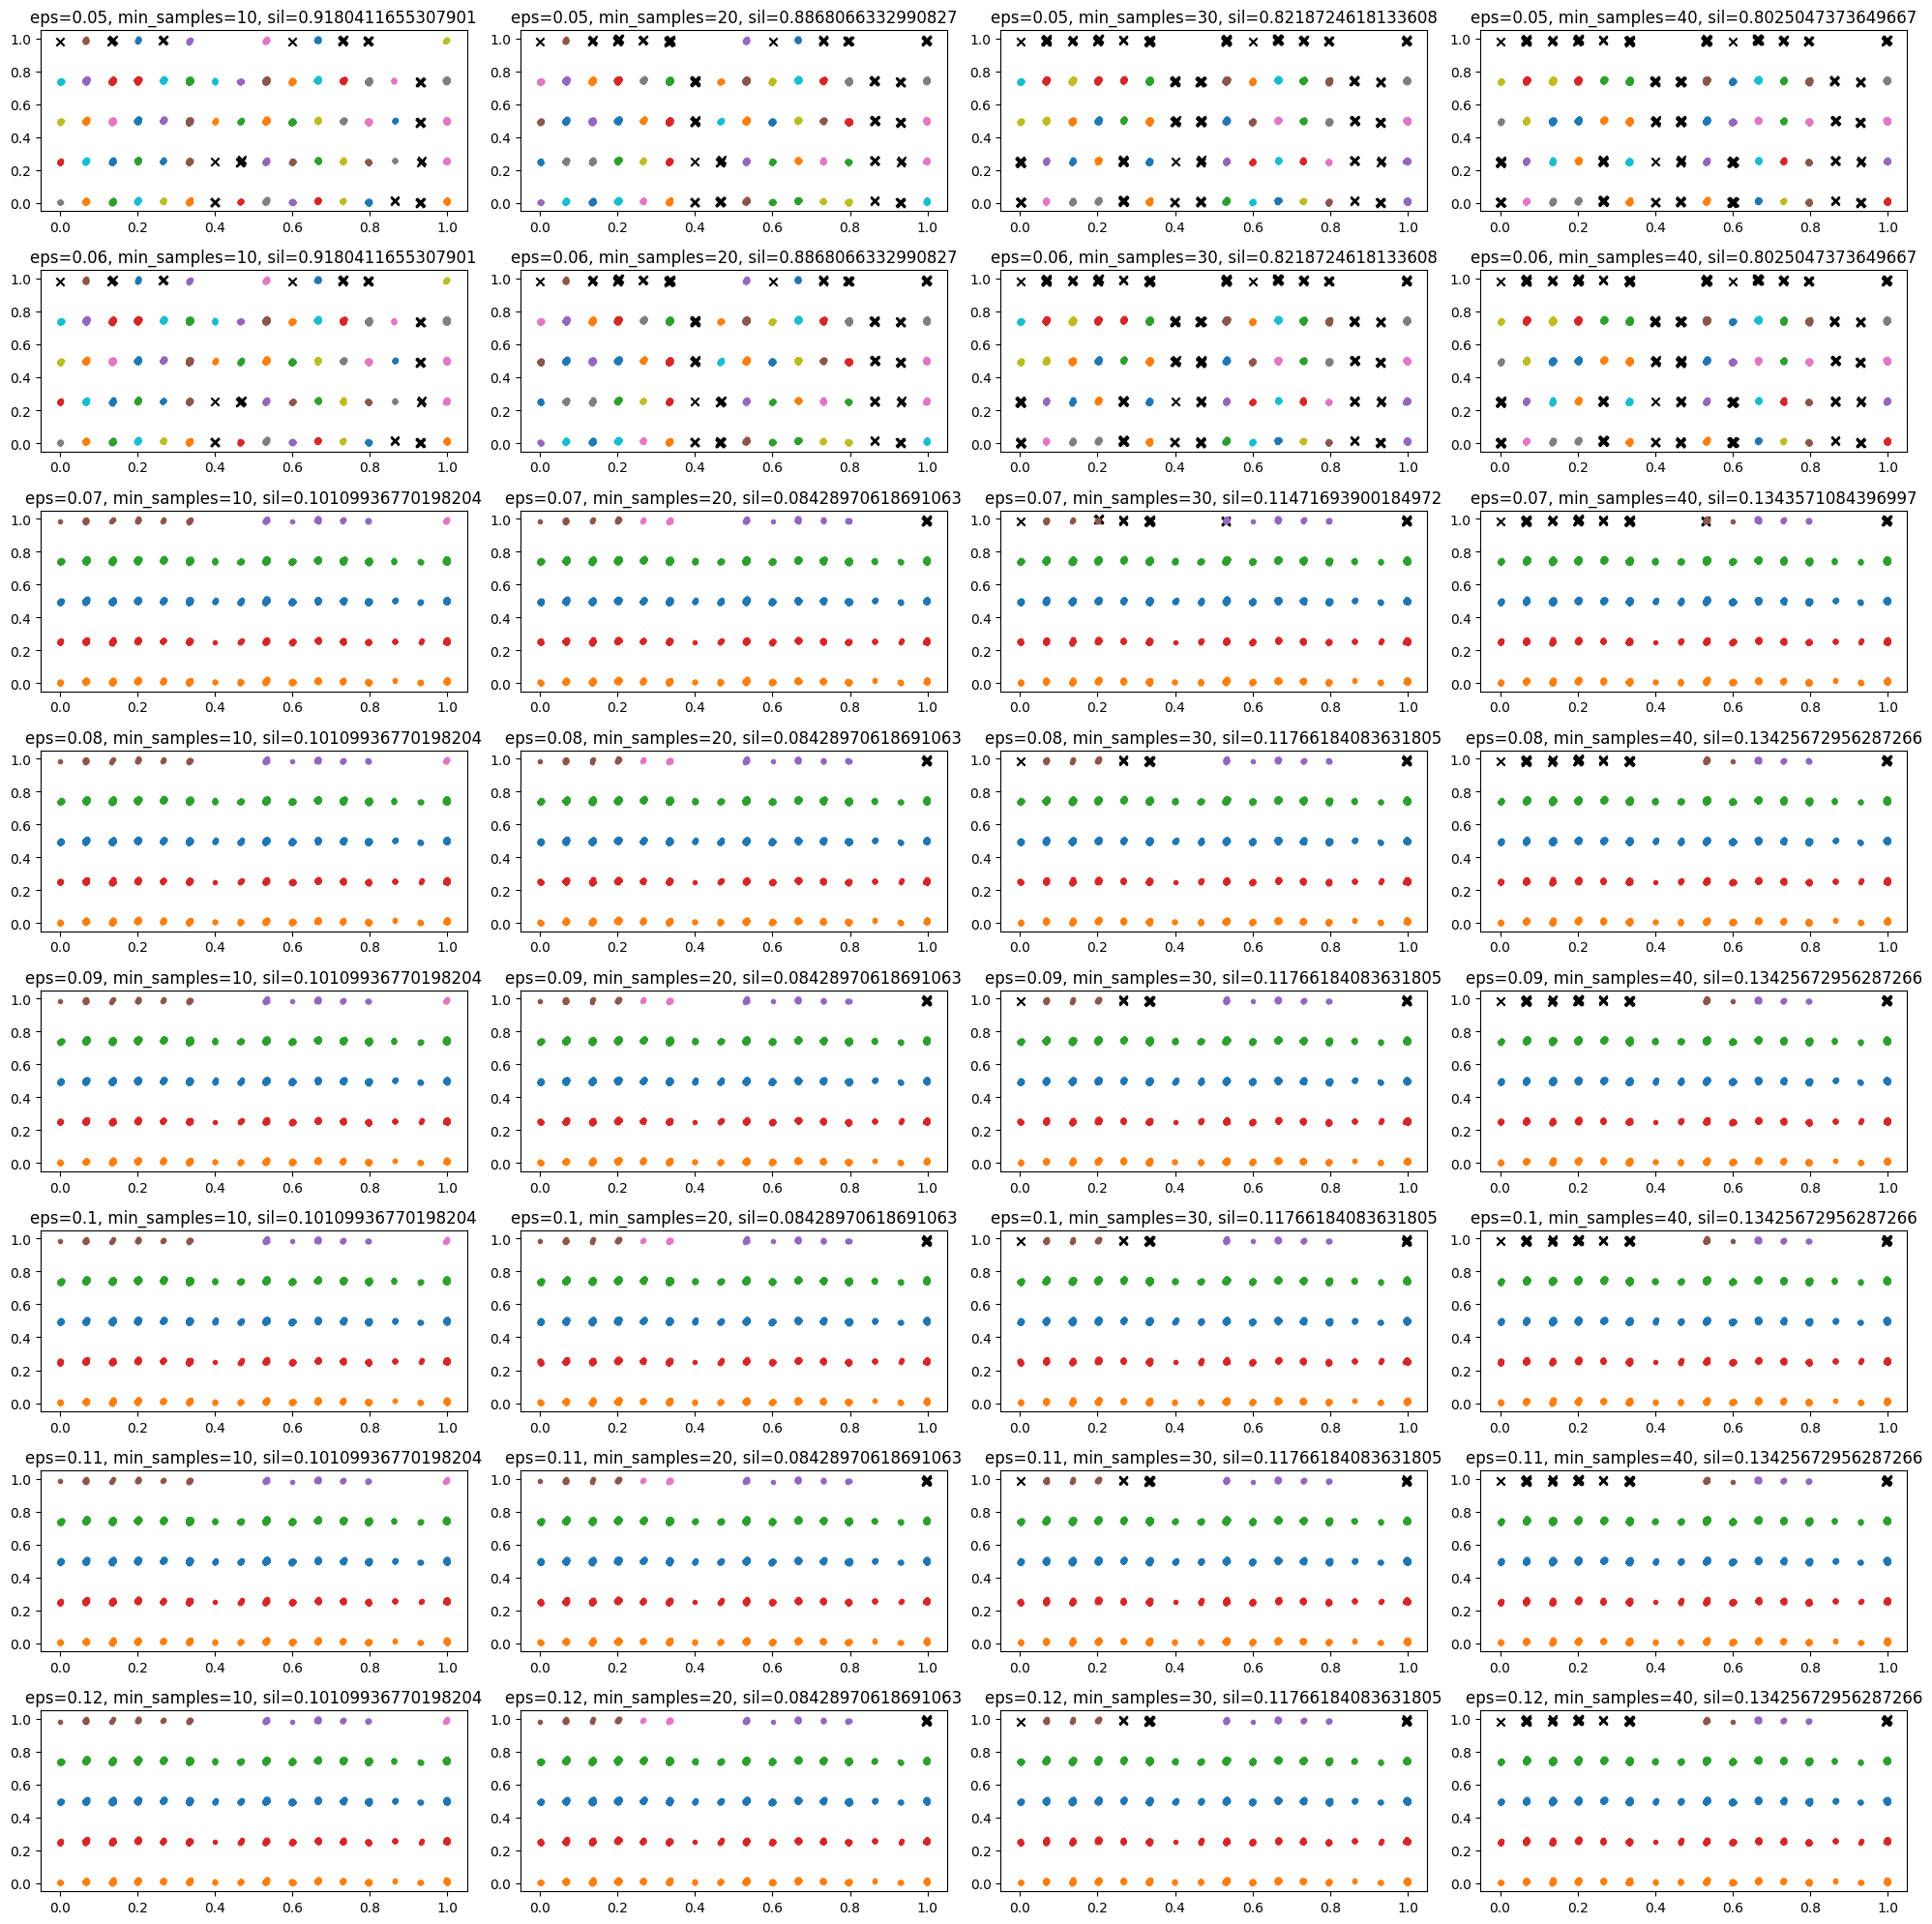

In [7]:
fig = plt.figure(figsize=(20,20))
plot_index = 1
silhouettes = []

for eps_value in eps_values:
  scores_per_eps = 0
  for samples in min_samples:
    model = DBSCAN(eps=eps_value, min_samples=samples)
    model.fit(df_scaled)

    fig.add_subplot(len(eps_values), len(min_samples), plot_index)
    plot_index += 1
    for cluster_label in range(-1, max(model.labels_) + 1):
      cluster = df_scaled[cluster_label == model.labels_]
      if cluster_label == -1:
        plt.scatter(cluster['pca_0'], cluster['pca_1'], label=f'sum {cluster_label}', marker='x', color='black')
      else:
        plt.scatter(cluster['pca_0'], cluster['pca_1'], label=f'cluster {cluster_label}', marker='.')
    plt.title(f'eps={round(eps_value, 2)}, min_samples={round(samples, 2)}, sil={silhouette_score(df_scaled, model.labels_)}')
    scores_per_eps += silhouette_score(df_scaled, model.labels_)
  
  silhouettes.append(scores_per_eps / len(min_samples))

plt.tight_layout()
plt.show()

Text(0, 0.5, 'silhouette score')

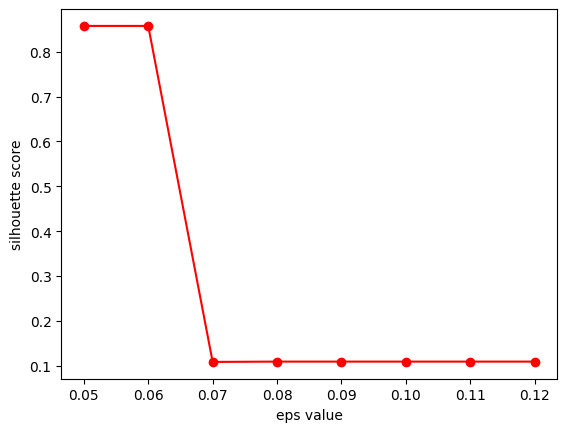

In [8]:
plt.plot(eps_values, silhouettes, marker='o', c='r', )
plt.xlabel('eps value')
plt.ylabel('silhouette score')

In [9]:
model = DBSCAN(eps=0.05, min_samples=40)
model.fit(df_scaled)

DBSCAN(eps=0.05, min_samples=40)

Text(0.5, 1.0, 'DBSCAN')

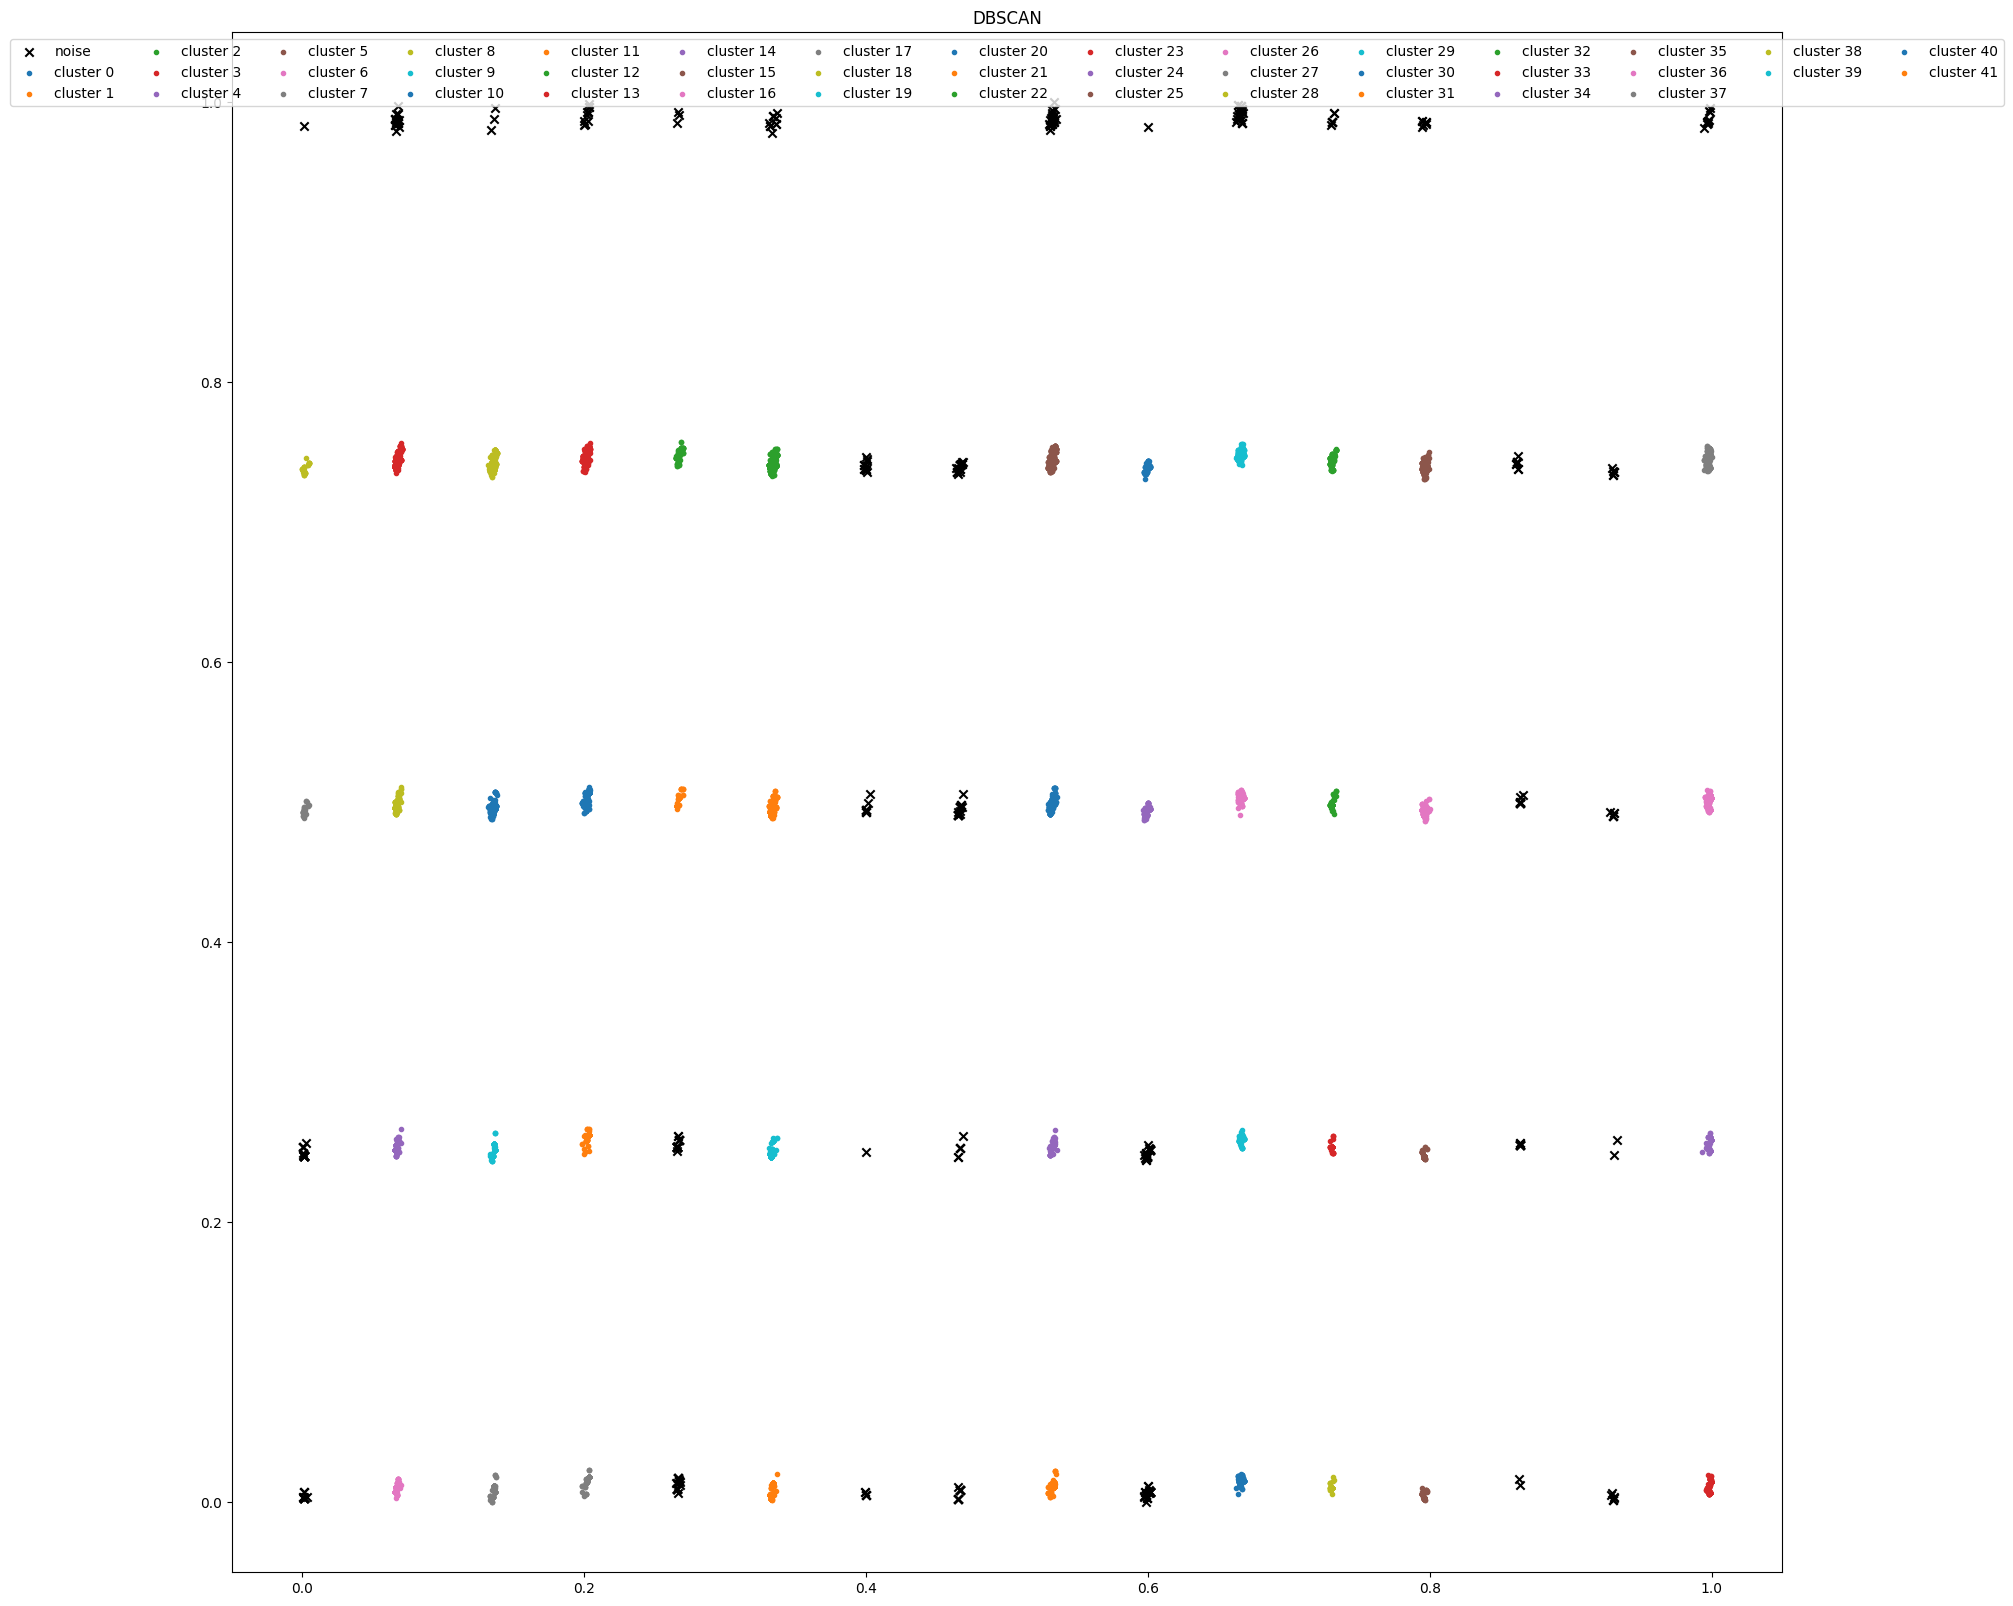

In [28]:
plt.figure(figsize=(20,20))
for cluster_label in range(-1, max(model.labels_) + 1):
      cluster = df_scaled[cluster_label == model.labels_]
      if cluster_label == -1:
        plt.scatter(cluster['pca_0'], cluster['pca_1'], label=f'noise', marker='x', color='black')
      else:
        plt.scatter(cluster['pca_0'], cluster['pca_1'], label=f'cluster {cluster_label}', marker='.')
plt.legend(loc='upper center', ncol=15)
plt.title('DBSCAN')

In [29]:
import pickle
import os

currDirPath = "../ModelsExport/Clustering"

models = [model]
names = ['DBSCAN_model.pkl']
for model, name in zip(models, names):
  try:
    with open(os.path.join(currDirPath,name),'wb') as file:
      pickle.dump(model,file)
  except IOError as err:
    print('Error while exporting model \'{}\''.format(name.split('.')[0]))
    print(err)
